In [1]:
import tables as tab
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [24]:
# open the file
path2 = "../Datasets/2022_07_11_Mjosa/2022_07_11_Mjosa/PRS_L1_STD_OFFL_20220711104640_20220711104644_0001.he5"

In [25]:
file2 = tab.open_file(path2)

In [26]:
data = file2.get_node("/HDFEOS/SWATHS/PRS_L1_HCO/")['Data Fields']['VNIR_Cube'][:,5:,:]

In [57]:
# open the labels
path1 = "../Datasets/2022_07_11_Mjosa/2022_07_11_Mjosa/PRS_L1_STD_OFFL_20220711104636_20220711104640_0001_labels.csv"
labels = np.loadtxt(path1, dtype=np.ubyte)

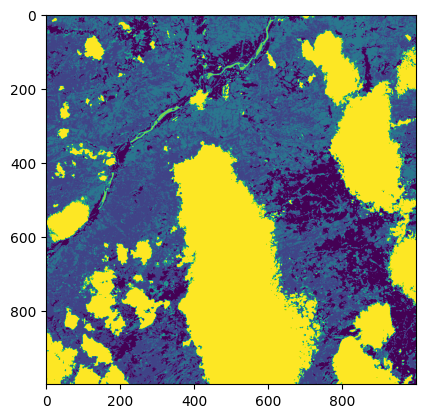

In [58]:
# plot the labels
plt.imshow(labels)

In [59]:
# prepare data
X, y = data.transpose(0,2,1).reshape((-1,61)), labels.flatten()

X = preprocessing.scale(X, axis=0)                    # Normalization
#X = preprocessing.normalize(X, axis=0)             # Standardization
print(X.shape, y.shape)

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.999, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

C:\Users\jonas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


(1000000, 61) (1000000,)
(1000, 61) (999000, 61) (1000,) (999000,)


In [60]:
# Generate SVM from training data
svma = LinearSVC(max_iter=1e5, tol=1e-5)

In [61]:
svma.fit(X_train, y_train)

LinearSVC(max_iter=100000.0, tol=1e-05)

In [62]:
# calculate overall accuracy on Training data
(svma.predict(X_train)==y_train).sum()/len(y_train)

0.748

In [63]:
# Accuracy on test data
(svma.predict(X_test)==y_test).sum()/len(y_test)

0.7237197197197197

In [64]:
Xout = svma.predict(X)

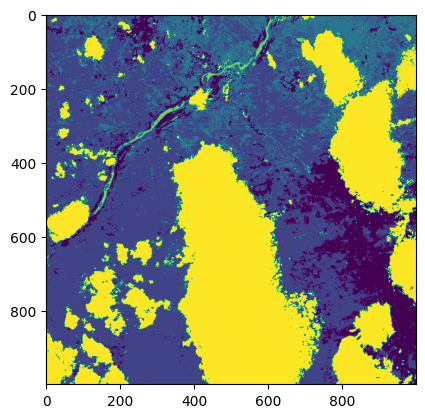

In [65]:
plt.imshow(Xout.reshape((1000,1000)))

In [66]:
cm = confusion_matrix(labels.flatten(), Xout, normalize='true')

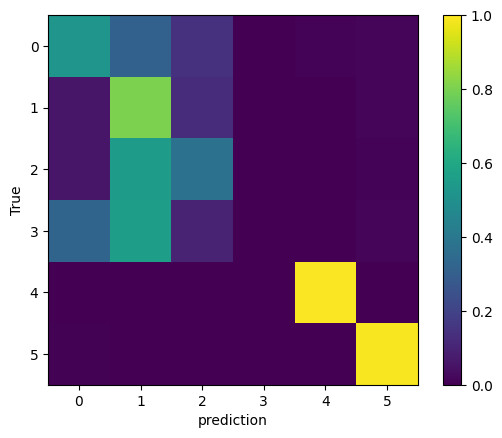

In [67]:
plt.imshow(cm, vmax=1, vmin=0)
plt.ylabel('True')
plt.xlabel('prediction')
plt.colorbar()